# スライスされた構造データの分析

In [2]:
# ---ライブラリのインポート ---
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
# --- 定数の設定 ---
# スライス設定
NUM_SLICES = 1
SLICE_DIRECTION = ['x', 'y', 'z']
num_slice = NUM_SLICES * len(SLICE_DIRECTION)

# .ptのデータフォルダ保存場所
# train以外の場合、適宜変更すること
PT_PATH = f"/mnt/c/Users/onion/Documents/slice_data_{'_'.join(SLICE_DIRECTION)}_{NUM_SLICES}/train"

# --- npyファイルの読み込み ---
# train以外の場合、適宜変更すること
FR_PATH = "/mnt/c/Users/onion/Documents/analysis/FR_train.npy"
M_PATH = "/mnt/c/Users/onion/Documents/analysis/m_train.npy"
KAPPA_PATH = "/mnt/c/Users/onion/Documents/analysis/kappa_train.npy"

filling_rate = np.load(FR_PATH)
m = np.load(M_PATH).ravel()
kappa = np.load(KAPPA_PATH).ravel()

# 読み込む構造データ数
num_structure = 1000

structure = []
for i in range(num_structure):
        st = torch.load(os.path.join(PT_PATH, f"structure_{i+1}.pt"))
        structure.append(st.numpy())

structure = np.stack(structure, axis=0)

print(filling_rate.shape)
print(m.shape)
print(kappa.shape)
print(structure.shape)

(63000,)
(63000,)
(63000,)
(1000, 3, 192, 192)


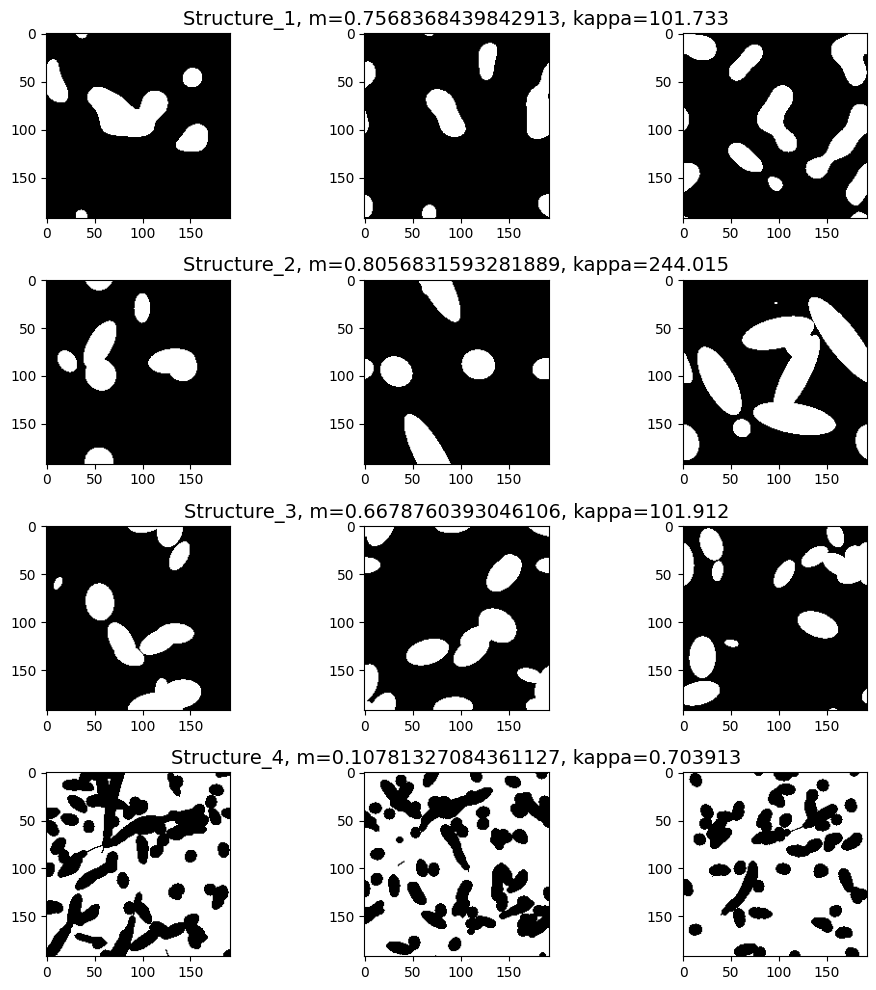

In [38]:
# --- 2D構造データの可視化 ---
num_show = 4
fig, axes = plt.subplots(num_show, num_slice, figsize=(10, 10))

# 共通のvmin, vmaxを設定（カラースケールを統一）
vmin = np.min(structure[:num_show])
vmax = np.max(structure[:num_show])

for i in range(num_show):
    for j in range(num_slice):
        ax = axes[i, j] if num_show > 1 else axes[j]
        im = ax.imshow(structure[i][j], cmap='gray', vmin=vmin, vmax=vmax)
        if j % num_slice == 1:
            ax.set_title(f"Structure_{i+1}, m={m[i]}, kappa={kappa[i]}", fontsize=14)

plt.tight_layout()
plt.show()